# Data Visualization with Python

This notebook covers essential data visualization techniques using popular Python libraries. Data visualization is critical for exploring data patterns, communicating insights, and making data-driven decisions.

## Topics Covered:
1. Introduction to Data Visualization
2. Matplotlib Basics
3. Seaborn for Statistical Visualization
4. Interactive Visualizations with Plotly
5. Geographical Data Visualization
6. Time Series Visualization
7. Advanced Customization Techniques
8. Best Practices for Data Visualization

## Setup: Install and Import Required Libraries

Let's set up our environment by installing and importing the necessary libraries.

In [3]:
# Uncomment and run this cell if you need to install any libraries
# !pip install matplotlib
# !pip install seaborn
# !pip install plotly
# !pip install pandas
# !pip install numpy
# !pip install folium

In [4]:
# Import the required libraries
import numpy as np            # For numerical operations
import pandas as pd           # For data manipulation and analysis
import matplotlib.pyplot as plt  # Basic plotting library
import seaborn as sns        # Statistical data visualization
import plotly.express as px  # High-level interface for interactive plots
import plotly.graph_objects as go  # Low-level interface for interactive plots
from plotly.subplots import make_subplots  # For creating subplots in plotly

# Set up default styles
%matplotlib inline
plt.style.use('seaborn-v0_8-whitegrid')  # Use a clean grid style with updated name
sns.set_style('whitegrid')  # Consistent styling with matplotlib
sns.set_context('notebook')  # Set the plotting context

# Set up display options
pd.set_option('display.max_columns', 50)  # Show more columns
pd.set_option('display.max_rows', 15)     # Limit number of rows displayed

# For reproducibility
np.random.seed(42)  # Ensures random numbers are the same each run

# No visible output for this cell, but it configures our visualization environment

## 1. Introduction to Data Visualization

Data visualization is the graphical representation of data to identify patterns, trends, and insights. It serves various purposes:
- **Data Exploration**: Discover patterns, outliers, and relationships
- **Data Communication**: Effectively convey findings to others
- **Decision Making**: Support data-driven decisions with visual evidence

### Real-Life Use Case: Business Performance Dashboard

A retail company uses visualizations to track key performance indicators (KPIs) across stores. Leadership can quickly identify underperforming locations, seasonal trends, and product categories that drive revenue. This visual approach allows for faster decision-making compared to analyzing raw numbers in spreadsheets.

In [5]:
# Creating sample datasets for visualizations

# Sample dataset 1: Simple numeric data for line plots
x = np.linspace(0, 10, 100)  # Creates 100 evenly spaced points from 0 to 10
y1 = np.sin(x)              # Sine wave
y2 = np.cos(x)              # Cosine wave
y3 = np.exp(-x/10) * np.sin(x)  # Damped sine wave

# Sample dataset 2: Categorical data for bar charts
categories = ['Category A', 'Category B', 'Category C', 'Category D']
values = [25, 40, 30, 55]

# Sample dataset 3: Time series data
dates = pd.date_range('2023-01-01', periods=100)  # 100 days starting from Jan 1, 2023
time_series = pd.Series(np.cumsum(np.random.randn(100)) + 10, index=dates)  # Random walk with drift

# Sample dataset 4: Multivariate data for scatter plots
n_points = 200
df_scatter = pd.DataFrame({
    'x': np.random.randn(n_points),  # Random x coordinates (normal distribution)
    'y': np.random.randn(n_points),  # Random y coordinates (normal distribution)
    'size': np.random.randint(1, 10, n_points),  # Random point sizes between 1 and 9
    'category': np.random.choice(['Group A', 'Group B', 'Group C'], n_points)  # Random group assignments
})

# Sample dataset 5: More realistic dataset for various complex plots
n_samples = 500
df = pd.DataFrame({
    'date': pd.date_range('2023-01-01', periods=n_samples),  # Consecutive dates
    'value': np.cumsum(np.random.randn(n_samples)),  # Cumulative sum creates a realistic time series
    'group': np.random.choice(['A', 'B', 'C', 'D'], n_samples),  # Random group assignments
    'category': np.random.choice(['Product', 'Service', 'Subscription'], n_samples),  # Business categories
    'growth': np.random.uniform(-5, 10, n_samples),  # Growth rates between -5% and 10%
    'revenue': np.random.exponential(100, n_samples) + 100,  # Revenue with exponential distribution
    'customers': np.random.randint(10, 1000, n_samples),  # Random number of customers
    'satisfaction': np.random.randint(1, 6, n_samples)  # Customer satisfaction scores between 1 and 5
})

# Create correlations
df['profit'] = df['revenue'] * 0.3 + np.random.normal(0, 20, n_samples)  # Profit correlated with revenue
df['churn'] = 10 - df['satisfaction'] + np.random.normal(0, 1, n_samples)  # Churn inversely correlated with satisfaction

print(f"Sample dataframe shape: {df.shape}")
df.head()

# Output:
# Sample dataframe shape: (500, 9)
# A dataframe with 500 rows and 9 columns will be displayed, showing the first 5 rows

Sample dataframe shape: (500, 10)


,date,value,group,category,growth,revenue,customers,satisfaction,profit,churn
0,2023-01-01,-1.840874,C,Product,-1.095697,175.701964,320,1,57.215871,9.224340
1,2023-01-02,-3.120451,A,Subscription,8.607925,190.419339,823,3,70.980257,7.904018
2,2023-01-03,-3.745270,B,Service,5.060985,100.997339,553,3,4.912592,6.702518
3,2023-01-04,-3.719179,D,Product,3.406609,162.379867,576,5,82.764253,6.311984
4,2023-01-05,-3.201520,D,Product,-3.335158,431.042222,873,2,133.359243,8.320786


## 2. Matplotlib Basics

Matplotlib is the foundation of Python visualization libraries. It provides a MATLAB-like interface for creating static, interactive, and animated visualizations.

### Real-Life Use Case: Scientific Research Publication

Research scientists use Matplotlib to create publication-quality figures for academic papers. The precise control over every element of a graph (axes, labels, colors, etc.) allows them to meet journal requirements and effectively communicate experimental results.

### Basic Line Plot with Matplotlib

**Introduction:**
A line plot is one of the most fundamental chart types for visualizing trends and changes over a continuous variable, such as time or measurement.

**Real-Life Use Case:**
Line plots are commonly used in finance to show stock prices over time, in science to display experimental results, or in business to track sales trends.

**What the code does:**
The following code creates a simple line plot using Matplotlib, displaying three different mathematical functions for comparison.

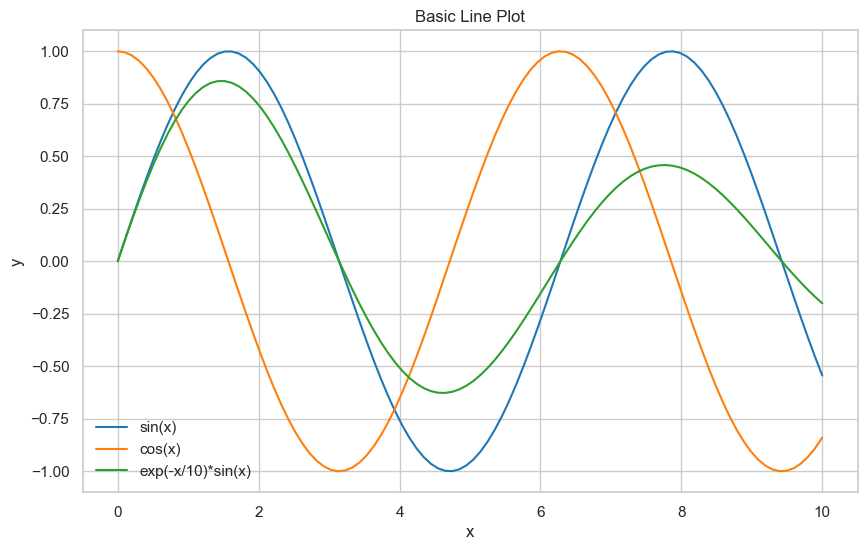

In [6]:
# Basic line plot
plt.figure(figsize=(10, 6))  # Create a figure with specified size
plt.plot(x, y1, label='sin(x)')  # Plot the sine wave
plt.plot(x, y2, label='cos(x)')  # Plot the cosine wave
plt.plot(x, y3, label='exp(-x/10)*sin(x)')  # Plot the damped sine wave
plt.xlabel('x')  # Label for the x-axis
plt.ylabel('y')  # Label for the y-axis
plt.title('Basic Line Plot')  # Title for the plot
plt.legend()  # Show the legend
plt.grid(True)  # Display the grid
plt.show()  # Display the plot

# Output: A line plot showing three curves (sine wave in blue, cosine wave in orange, and
# a damped sine wave in green) with a grid, labels, title, and legend

### Plotting a Cosine Wave

**Introduction:**
Cosine waves are used in signal processing, engineering, and physics to represent periodic phenomena.

**Real-Life Use Case:**
Engineers use cosine waves to analyze alternating current (AC) signals in electrical circuits.

**What the code does:**
This code plots the cosine function on the same x-axis for comparison with the sine wave.

In [ ]:
# Plotting the cosine wave
plt.figure(figsize=(10, 6))
plt.plot(x, y2, label='cos(x)', color='orange')  # Plot the cosine wave in orange
plt.xlabel('x')
plt.ylabel('y')
plt.title('Cosine Wave')
plt.legend()
plt.grid(True)
plt.show()

### Damped Sine Wave Plot

**Introduction:**
A damped sine wave shows how oscillations decrease over time, which is common in physical systems with friction or resistance.

**Real-Life Use Case:**
Damped sine waves are used to model vibrations in mechanical engineering, such as a car's suspension system after hitting a bump.

**What the code does:**
This code plots a sine wave whose amplitude decreases over time, simulating a damping effect.

In [ ]:
# Plotting the damped sine wave
plt.figure(figsize=(10, 6))
plt.plot(x, y3, label='exp(-x/10)*sin(x)', color='green')  # Damped sine wave in green
plt.xlabel('x')
plt.ylabel('y')
plt.title('Damped Sine Wave')
plt.legend()
plt.grid(True)
plt.show()

### Comparing Multiple Functions in One Plot

**Introduction:**
Overlaying multiple lines in a single plot allows for direct comparison between different datasets or mathematical functions.

**Real-Life Use Case:**
A business analyst might compare sales trends for different products on the same chart to spot correlations or divergences.

**What the code does:**
This code overlays the sine, cosine, and damped sine waves in a single plot for easy comparison.

In [ ]:
# Plotting all three functions together for comparison
plt.figure(figsize=(10, 6))
plt.plot(x, y1, label='sin(x)')
plt.plot(x, y2, label='cos(x)')
plt.plot(x, y3, label='exp(-x/10)*sin(x)')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Comparison of Sine, Cosine, and Damped Sine Waves')
plt.legend()
plt.grid(True)
plt.show()

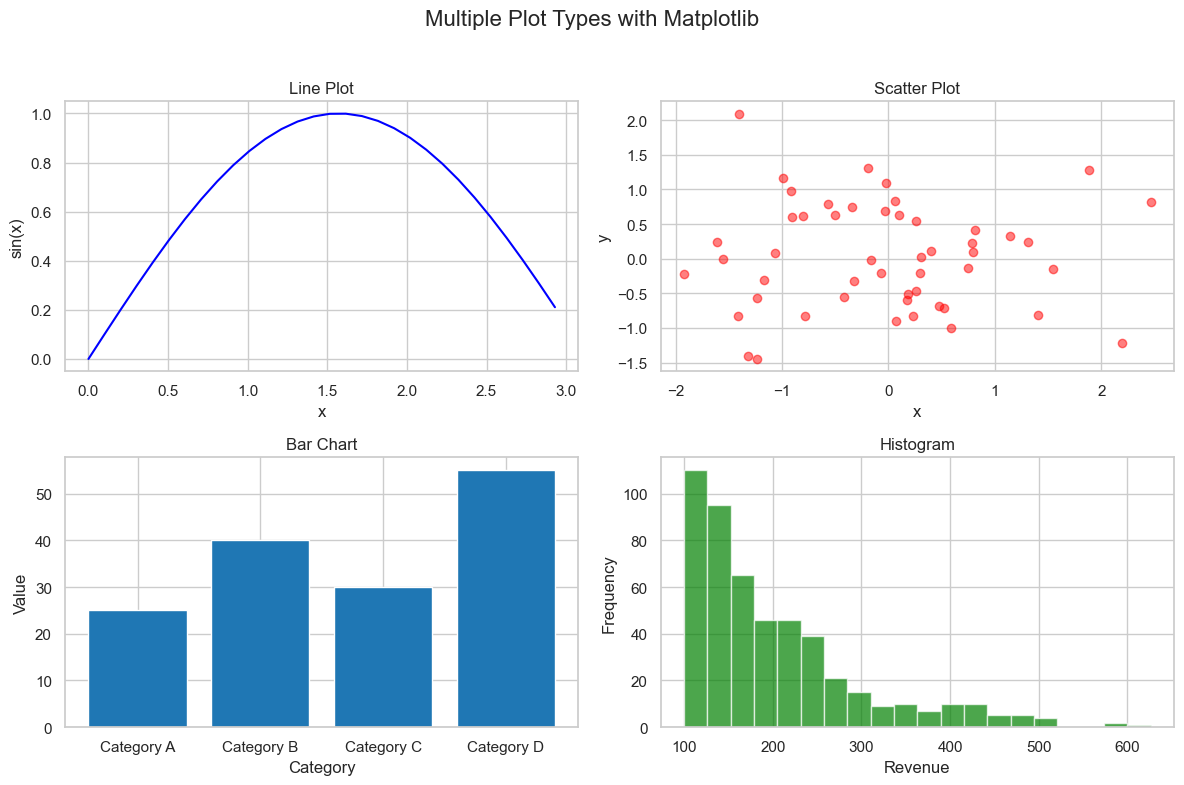

In [ ]:
# Plotting the sine wave
plt.figure(figsize=(10, 6))  # Set the figure size
plt.plot(x, y1, label='sin(x)')  # Plot the sine wave
plt.xlabel('x')  # Label for the x-axis
plt.ylabel('y')  # Label for the y-axis
plt.title('Sine Wave')  # Title for the plot
plt.legend()  # Show the legend
plt.grid(True)  # Display the grid
plt.show()  # Display the plot

# Plotting the cosine wave
plt.figure(figsize=(10, 6))  # Set the figure size
plt.plot(x, y2, label='cos(x)', color='orange')  # Plot the cosine wave
plt.xlabel('x')  # Label for the x-axis
plt.ylabel('y')  # Label for the y-axis
plt.title('Cosine Wave')  # Title for the plot
plt.legend()  # Show the legend
plt.grid(True)  # Display the grid
plt.show()  # Display the plot

# Plotting the damped sine wave
plt.figure(figsize=(10, 6))  # Set the figure size
plt.plot(x, y3, label='sin(x) * exp(-0.1x)', color='green')  # Plot the damped sine wave
plt.xlabel('x')  # Label for the x-axis
plt.ylabel('y')  # Label for the y-axis
plt.title('Damped Sine Wave')  # Title for the plot
plt.legend()  # Show the legend
plt.grid(True)  # Display the grid
plt.show()  # Display the plot

# Creating subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 8))  # Create a 2x2 grid of subplots
fig.suptitle('Multiple Plot Types with Matplotlib', fontsize=16)  # Main title for all subplots

# Line plot (top-left)
axes[0, 0].plot(x[:30], y1[:30], 'b-')  # Plot first 30 points of sine wave in blue
axes[0, 0].set_title('Line Plot')  # Title for this subplot
axes[0, 0].set_xlabel('x')  # X-axis label
axes[0, 0].set_ylabel('sin(x)')  # Y-axis label

# Scatter plot (top-right)
axes[0, 1].scatter(df_scatter['x'][:50], df_scatter['y'][:50], c='r', alpha=0.5)  # 50 red semi-transparent points
axes[0, 1].set_title('Scatter Plot')  # Title for this subplot
axes[0, 1].set_xlabel('x')  # X-axis label
axes[0, 1].set_ylabel('y')  # Y-axis label

# Bar chart
axes[1, 0].bar(categories, values)
axes[1, 0].set_title('Bar Chart')
axes[1, 0].set_xlabel('Category')
axes[1, 0].set_ylabel('Value')

# Histogram
axes[1, 1].hist(df['revenue'], bins=20, alpha=0.7, color='green')
axes[1, 1].set_title('Histogram')
axes[1, 1].set_xlabel('Revenue')
axes[1, 1].set_ylabel('Frequency')

# Output: A figure with 4 subplots arranged in a 2x2 grid. The top-left shows a blue sine wave,
# the top-right shows a scatter plot with red points, the bottom-left shows a bar chart, 
# and the bottom-right shows a histogram.

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

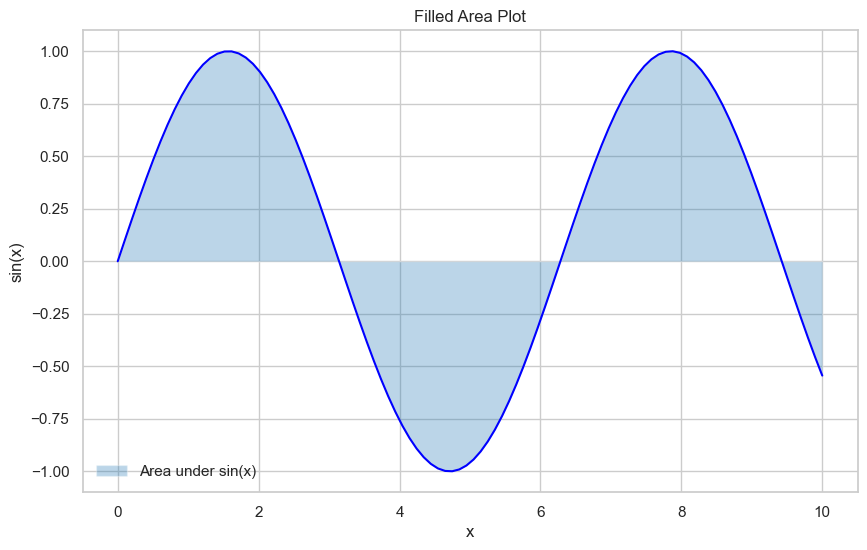

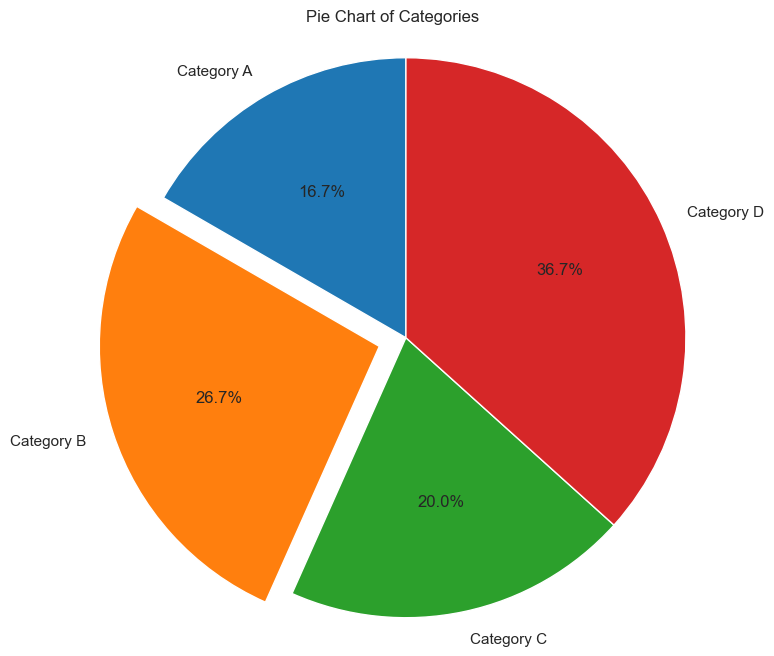

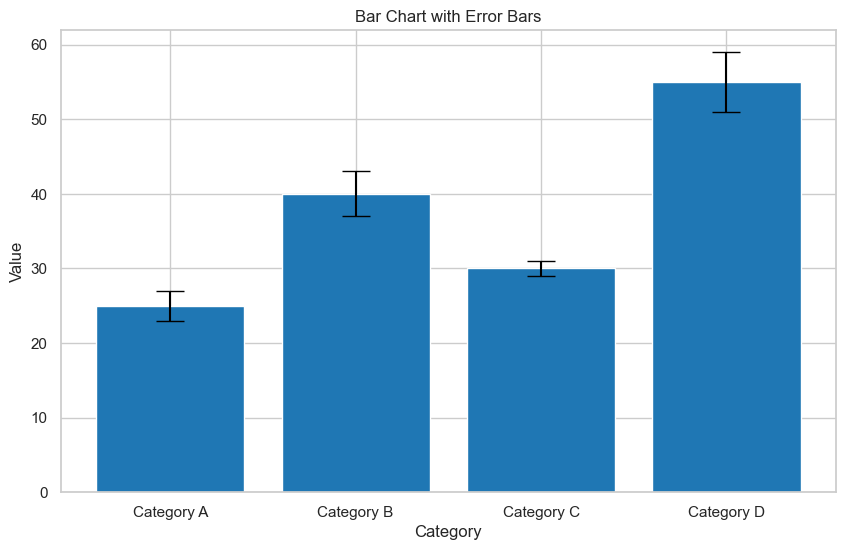

In [8]:
# More advanced Matplotlib examples

# Filled area plot
plt.figure(figsize=(10, 6))
plt.fill_between(x, y1, alpha=0.3, label='Area under sin(x)')
plt.plot(x, y1, 'b-')
plt.title('Filled Area Plot')
plt.xlabel('x')
plt.ylabel('sin(x)')
plt.legend()
plt.grid(True)
plt.show()

# Pie chart
plt.figure(figsize=(8, 8))
plt.pie(values, labels=categories, autopct='%1.1f%%', startangle=90, explode=[0, 0.1, 0, 0])
plt.title('Pie Chart of Categories')
plt.axis('equal')  # Equal aspect ratio ensures the pie is drawn as a circle
plt.show()

# Error bars
x_err = np.arange(len(categories))
errors = [2, 3, 1, 4]

plt.figure(figsize=(10, 6))
plt.bar(x_err, values, yerr=errors, capsize=10)
plt.xticks(x_err, categories)
plt.title('Bar Chart with Error Bars')
plt.xlabel('Category')
plt.ylabel('Value')
plt.show()

## 3. Seaborn for Statistical Visualization

Seaborn is built on top of Matplotlib and provides a higher-level interface for drawing attractive and informative statistical graphics. It's particularly useful for exploring relationships between variables.

### Real-Life Use Case: Market Research Analysis

Market researchers use Seaborn to analyze survey data and consumer preferences. The library's specialized plots like heatmaps for correlation analysis help identify patterns in consumer behavior, while categorical plots reveal differences across demographic segments.

Sample of the tips dataset:
   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


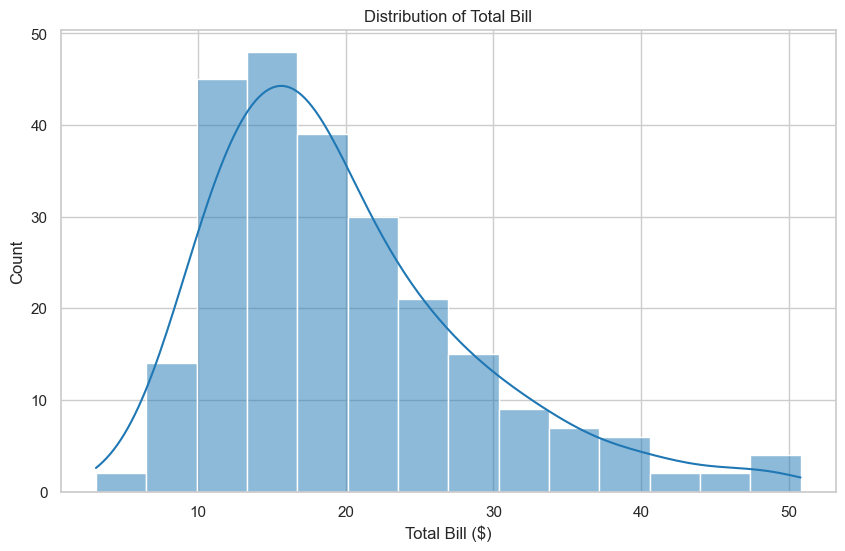

In [9]:
# Load a sample dataset from seaborn
tips = sns.load_dataset('tips')
print("Sample of the tips dataset:")
print(tips.head())

# Basic Seaborn plot
plt.figure(figsize=(10, 6))
sns.histplot(tips['total_bill'], kde=True)
plt.title('Distribution of Total Bill')
plt.xlabel('Total Bill ($)')
plt.ylabel('Count')
plt.show()

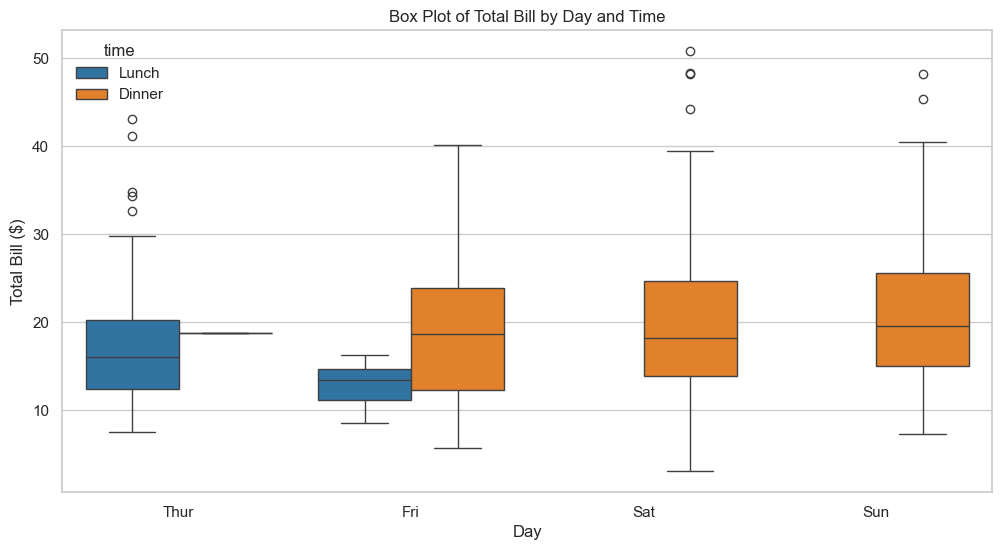

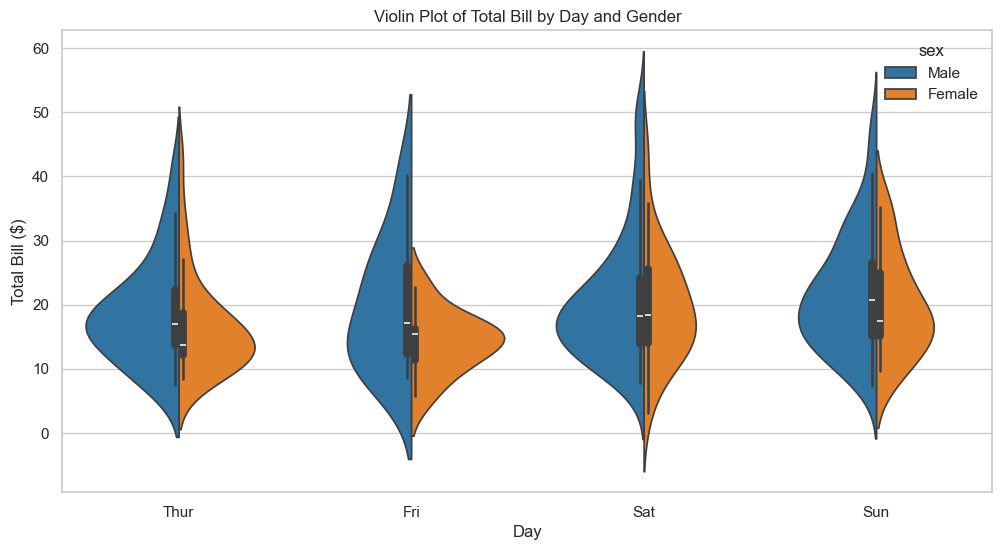

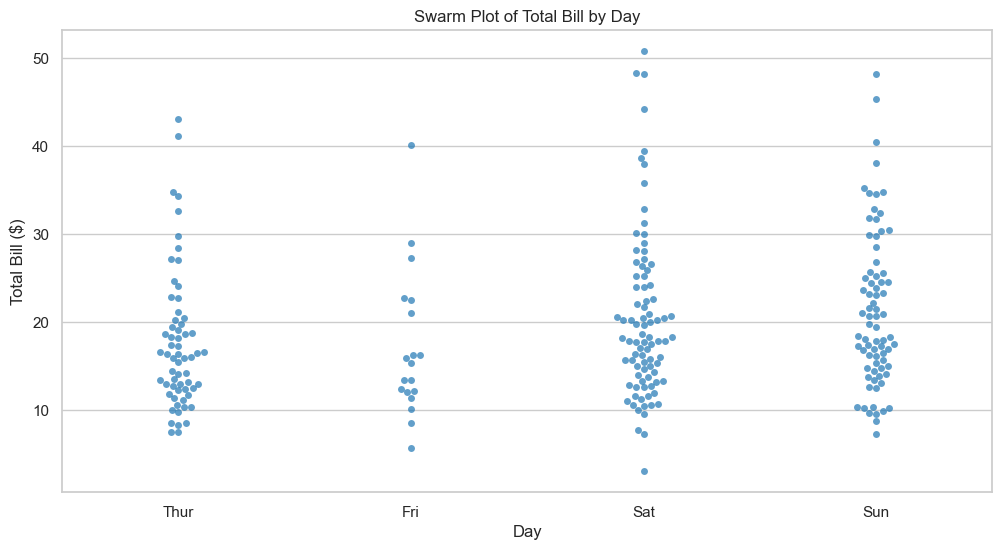

In [10]:
# Categorical plots

# Box plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='day', y='total_bill', hue='time', data=tips)
plt.title('Box Plot of Total Bill by Day and Time')
plt.xlabel('Day')
plt.ylabel('Total Bill ($)')
plt.show()

# Violin plot
plt.figure(figsize=(12, 6))
sns.violinplot(x='day', y='total_bill', hue='sex', split=True, data=tips)
plt.title('Violin Plot of Total Bill by Day and Gender')
plt.xlabel('Day')
plt.ylabel('Total Bill ($)')
plt.show()

# Categorical scatter plot
plt.figure(figsize=(12, 6))
sns.swarmplot(x='day', y='total_bill', data=tips, alpha=0.7)
plt.title('Swarm Plot of Total Bill by Day')
plt.xlabel('Day')
plt.ylabel('Total Bill ($)')
plt.show()

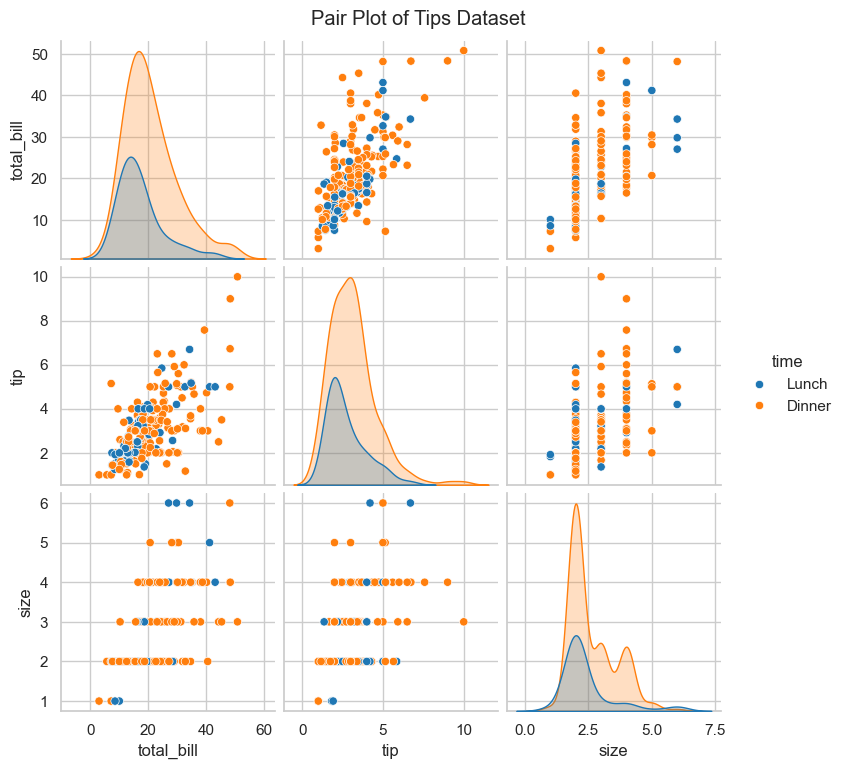

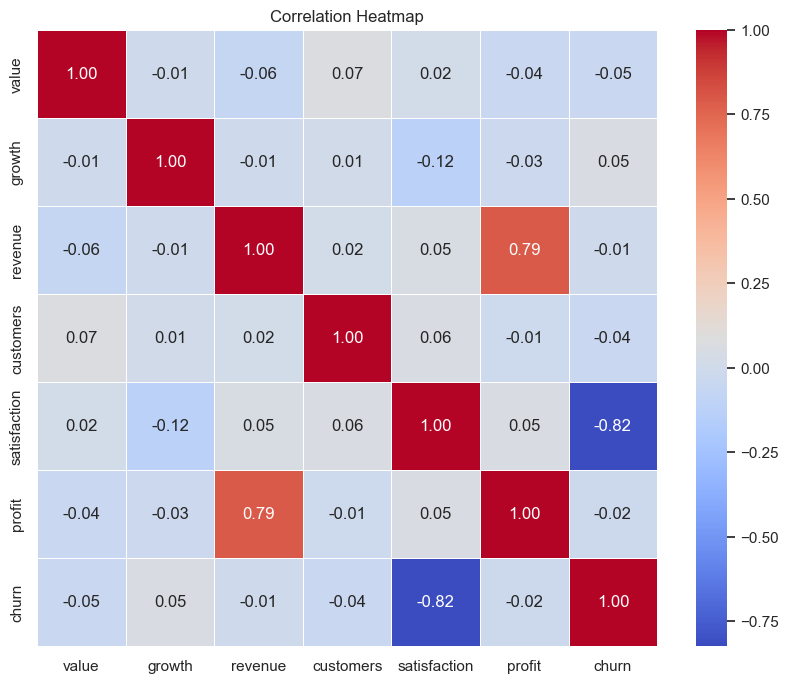

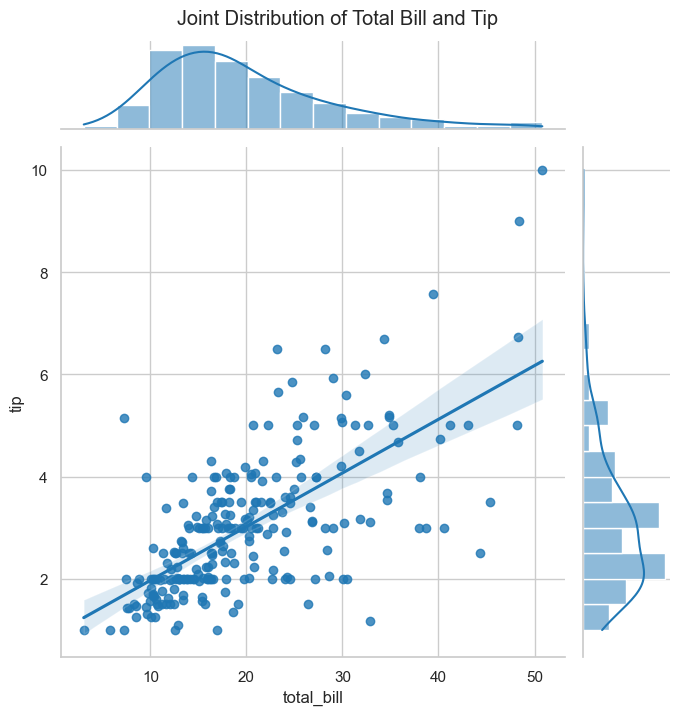

In [11]:
# Advanced Seaborn plots

# Pair plot for multivariate analysis
sns.pairplot(tips, hue='time', height=2.5)
plt.suptitle('Pair Plot of Tips Dataset', y=1.02)
plt.show()

# Correlation heatmap using our custom dataset
plt.figure(figsize=(10, 8))
correlation_matrix = df[['value', 'growth', 'revenue', 'customers', 'satisfaction', 'profit', 'churn']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# Joint plot to show bivariate distribution
sns.jointplot(x='total_bill', y='tip', data=tips, kind='reg', height=7)
plt.suptitle('Joint Distribution of Total Bill and Tip', y=1.02)
plt.show()

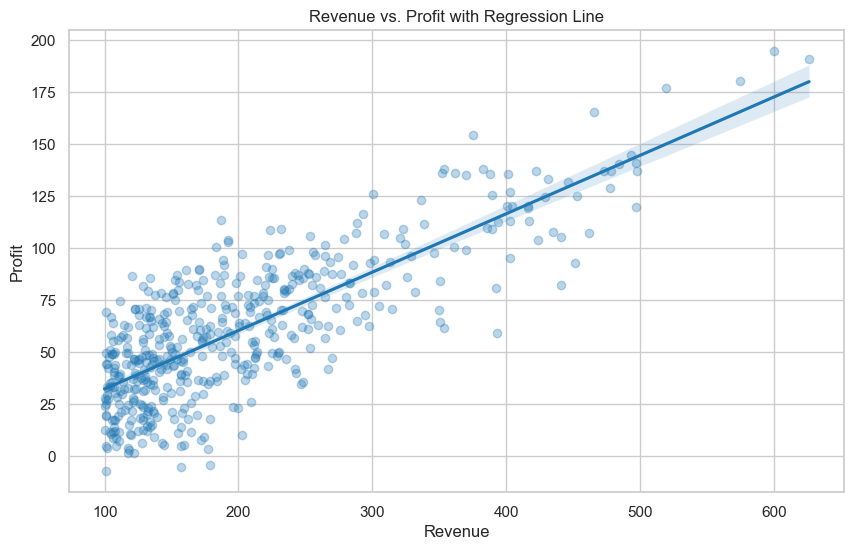

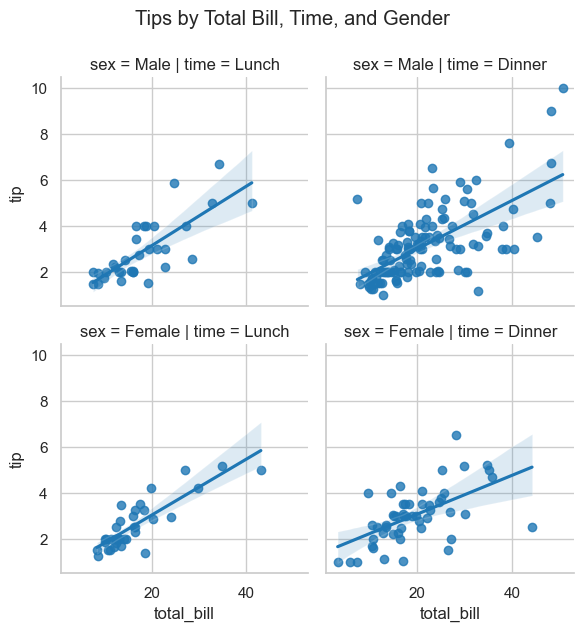

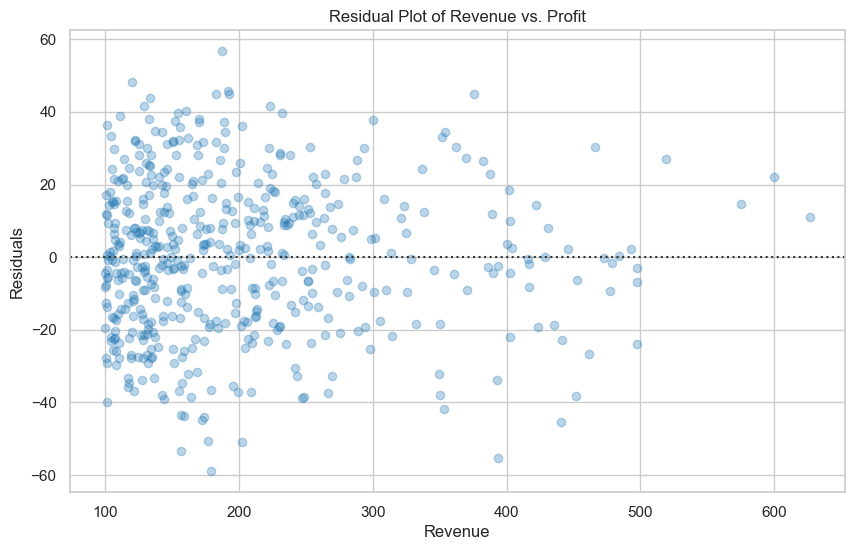

In [12]:
# Regression plots

# Simple linear regression plot
plt.figure(figsize=(10, 6))
sns.regplot(x='revenue', y='profit', data=df, scatter_kws={'alpha':0.3})
plt.title('Revenue vs. Profit with Regression Line')
plt.xlabel('Revenue')
plt.ylabel('Profit')
plt.show()

# More complex regression with faceting
g = sns.lmplot(x='total_bill', y='tip', col='time', row='sex', data=tips, height=3)
g.fig.suptitle('Tips by Total Bill, Time, and Gender', y=1.05)
plt.show()

# Residual plot
plt.figure(figsize=(10, 6))
sns.residplot(x='revenue', y='profit', data=df, scatter_kws={'alpha':0.3})
plt.title('Residual Plot of Revenue vs. Profit')
plt.xlabel('Revenue')
plt.ylabel('Residuals')
plt.show()

## 4. Interactive Visualizations with Plotly

Plotly creates interactive plots that allow users to zoom, pan, and hover over data points to see additional information. This is especially useful for exploratory data analysis and creating dashboards.

### Real-Life Use Case: Financial Dashboard

Financial analysts use Plotly to build interactive dashboards for stock market analysis. Users can hover over price points to see exact values, zoom in on specific time periods, and toggle between different technical indicators—all without requiring multiple static charts.

In [13]:
# Basic Plotly line chart
fig = px.line(x=x, y=[y1, y2, y3], labels={'x': 'X Value', 'value': 'Y Value'},
              title='Interactive Line Plot')
fig.update_layout(legend_title_text='Function')
fig.show()

In [14]:
# Interactive scatter plot
fig = px.scatter(df_scatter, x='x', y='y', color='category', size='size',
                 title='Interactive Scatter Plot with Color and Size',
                 labels={'x': 'X Value', 'y': 'Y Value', 'category': 'Group'},
                 hover_data=['size'])
fig.show()

c:\Users\mb\AppData\Local\Programs\Python\Python312\Lib\site-packages\plotly\express\_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [15]:
# Bar chart
fig = px.bar(x=categories, y=values, 
            labels={'x': 'Category', 'y': 'Value'},
            title='Interactive Bar Chart',
            color=values,
            color_continuous_scale='Viridis')
fig.show()

In [17]:
# Advanced Plotly visualizations

# Histogram with multiple traces
fig = px.histogram(df, x='revenue', color='category', marginal='box',
                   title='Revenue Distribution by Category',
                   labels={'revenue': 'Revenue ($)', 'category': 'Category'},
                   opacity=0.7)
fig.show()

# Box plot
fig = px.box(df, x='group', y='revenue', color='category',
              title='Revenue by Group and Category',
              points='all',  # Show all points
              labels={'revenue': 'Revenue ($)', 'group': 'Group', 'category': 'Category'})
fig.show()

# Sunburst chart for hierarchical data
fig = px.sunburst(df, path=['group', 'category'], values='revenue',
                  title='Revenue by Group and Category (Sunburst)',
                  color='revenue',
                  color_continuous_scale='RdBu',
                  labels={'revenue': 'Revenue ($)'})
fig.show()

# 3D scatter plot
# Using abs() to ensure size values are positive
sampled_df = df.sample(100)
fig = px.scatter_3d(sampled_df, x='revenue', y='customers', z='satisfaction',
                    color='group', size=sampled_df['profit'].abs(),  # Use absolute values for size
                    title='3D Scatter Plot of Revenue, Customers, and Satisfaction',
                    labels={'revenue': 'Revenue ($)', 'customers': 'Customer Count', 
                           'satisfaction': 'Satisfaction Score'},
                    opacity=0.7)
fig.show()

c:\Users\mb\AppData\Local\Programs\Python\Python312\Lib\site-packages\plotly\express\_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



c:\Users\mb\AppData\Local\Programs\Python\Python312\Lib\site-packages\plotly\express\_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



c:\Users\mb\AppData\Local\Programs\Python\Python312\Lib\site-packages\plotly\express\_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



## 5. Geographical Data Visualization

Visualizing data on maps can reveal spatial patterns and regional variations. Python offers several libraries for geographical visualization.

### Real-Life Use Case: Epidemiology

Health organizations use geographical visualizations to track disease outbreaks and allocate resources effectively. Map-based visualizations help identify hotspots, monitor the spread over time, and communicate risk levels to the public and policymakers.

In [19]:
# Create some sample geographical data
countries = ['United States', 'Canada', 'Mexico', 'Brazil', 'France', 'Germany', 
            'United Kingdom', 'China', 'Japan', 'Australia', 'India', 'South Africa']
values = np.random.randint(10, 100, len(countries))
lat = [37.0902, 56.1304, 23.6345, -14.2350, 46.2276, 51.1657, 
       55.3781, 35.8617, 36.2048, -25.2744, 20.5937, -30.5595]
lon = [-95.7129, -106.3468, -102.5528, -51.9253, 2.2137, 10.4515, 
       -3.4360, 104.1954, 138.2529, 133.7751, 78.9629, 22.9375]

geo_df = pd.DataFrame({
    'country': countries,
    'value': values,
    'lat': lat,
    'lon': lon
})

print("Sample of geographical data:")
geo_df.head()

Sample of geographical data:


,country,value,lat,lon
0,United States,96,37.0902,-95.7129
1,Canada,36,56.1304,-106.3468
2,Mexico,49,23.6345,-102.5528
3,Brazil,35,-14.2350,-51.9253
4,France,36,46.2276,2.2137


In [20]:
# Plotly choropleth map (world)
fig = px.choropleth(geo_df,
                    locations='country',
                    locationmode='country names',
                    color='value',
                    hover_name='country',
                    title='Sample Global Data by Country',
                    color_continuous_scale=px.colors.sequential.Plasma)
fig.update_layout(geo=dict(showframe=False, showcoastlines=True))
fig.show()

# Plotly scatter geo
fig = px.scatter_geo(geo_df,
                     lat='lat',
                     lon='lon',
                     color='value',
                     size='value',
                     hover_name='country',
                     title='Bubble Map of Sample Data',
                     projection='natural earth')
fig.show()

## 6. Time Series Visualization

Time series visualizations help identify trends, seasonality, and anomalies in data that changes over time.

### Real-Life Use Case: Stock Market Analysis

Financial analysts use time series visualizations to analyze stock price movements and trading volumes. Technical analysts examine patterns like moving averages, support/resistance levels, and volatility metrics to make investment decisions.

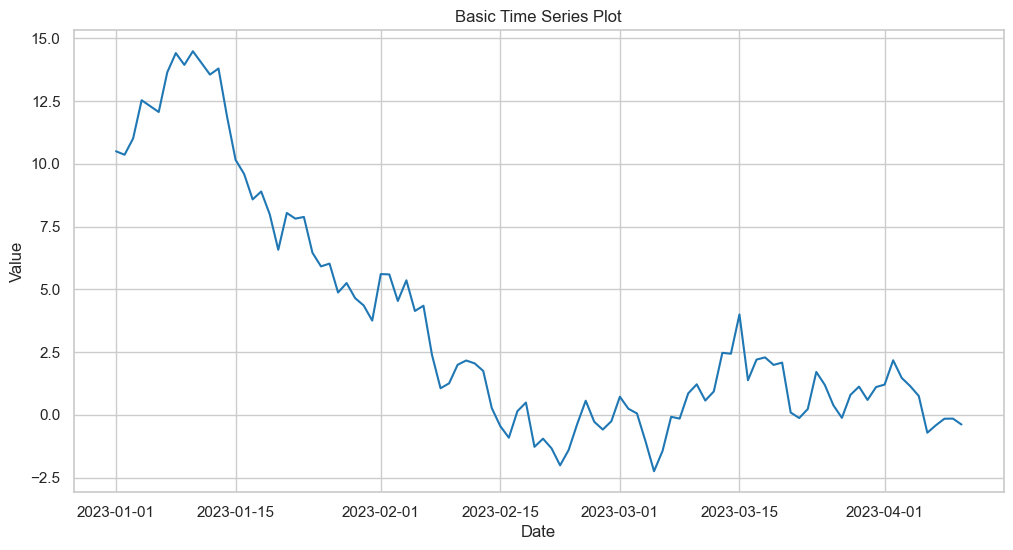

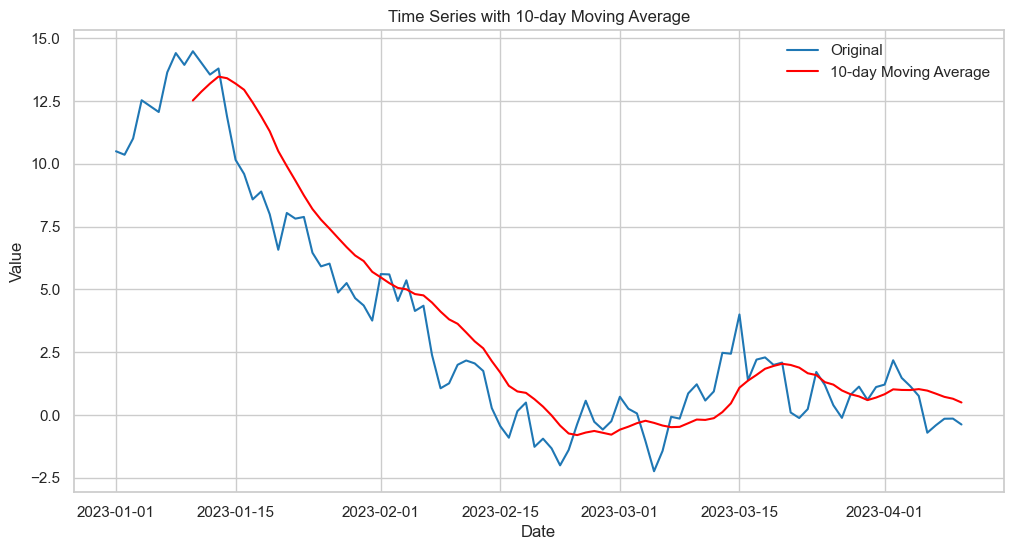

In [21]:
# Basic time series plot with Matplotlib
plt.figure(figsize=(12, 6))
plt.plot(time_series.index, time_series.values)
plt.title('Basic Time Series Plot')
plt.xlabel('Date')
plt.ylabel('Value')
plt.grid(True)
plt.show()

# Time series with moving average
rolling_mean = time_series.rolling(window=10).mean()

plt.figure(figsize=(12, 6))
plt.plot(time_series.index, time_series.values, label='Original')
plt.plot(rolling_mean.index, rolling_mean.values, 'r', label='10-day Moving Average')
plt.title('Time Series with 10-day Moving Average')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

In [22]:
# Interactive time series with Plotly
fig = px.line(x=time_series.index, y=time_series.values,
              labels={'x': 'Date', 'y': 'Value'},
              title='Interactive Time Series Plot')
fig.update_xaxes(rangeslider_visible=True)
fig.show()

# Create financial data for candlestick chart
dates = pd.date_range('2023-01-01', periods=30)
base_price = 100
np.random.seed(42)
movements = np.random.normal(0, 2, 30).cumsum()
opens = base_price + movements
closes = opens + np.random.normal(0, 1, 30)
highs = np.maximum(opens, closes) + np.random.uniform(0.1, 1, 30)
lows = np.minimum(opens, closes) - np.random.uniform(0.1, 1, 30)
volumes = np.random.randint(100, 1000, 30)

stock_df = pd.DataFrame({
    'Date': dates,
    'Open': opens,
    'High': highs,
    'Low': lows,
    'Close': closes,
    'Volume': volumes
})

# Candlestick chart
fig = go.Figure(data=[go.Candlestick(
    x=stock_df['Date'],
    open=stock_df['Open'],
    high=stock_df['High'],
    low=stock_df['Low'],
    close=stock_df['Close']
)])

fig.update_layout(title='Candlestick Chart', xaxis_title='Date', yaxis_title='Price')
fig.show()

## 7. Advanced Customization Techniques

Advanced customization allows you to create publication-ready visualizations with specific formatting requirements.

### Real-Life Use Case: Corporate Reporting

Corporate analysts create visualizations that adhere to company branding guidelines for investor presentations and annual reports. Advanced customization allows them to match exact brand colors, fonts, and styles while maintaining data clarity.

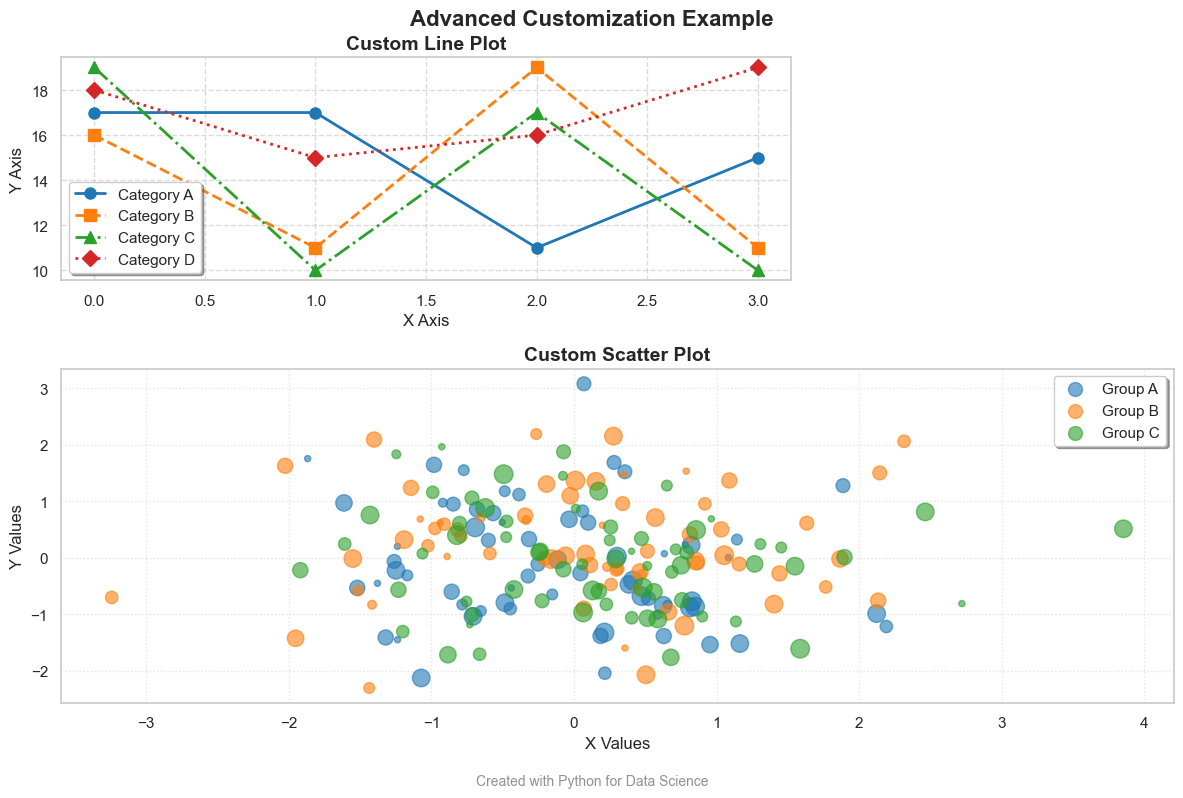

In [31]:
# Highly customized Matplotlib plot
plt.figure(figsize=(12, 8))

# Define custom colors and styles
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']*2
line_styles = ['-', '--', '-.', ':']*2
markers = ['o', 's', '^', 'D']*2

# Create a complex subplot layout
gs = plt.GridSpec(2, 2, width_ratios=[2, 1], height_ratios=[1, 1.5])

# First subplot: Line plot with custom styling
ax1 = plt.subplot(gs[0, 0])
# Create one line for each category
for i, category in enumerate(categories):
    # Generate random y-values for this specific category line
    y_values = np.random.randint(10, 20, len(categories))
    ax1.plot(range(len(categories)), y_values, 
             color=colors[i], linestyle=line_styles[i], marker=markers[i], 
             linewidth=2, markersize=8, label=category)
ax1.set_title('Custom Line Plot', fontsize=14, fontweight='bold')
ax1.set_xlabel('X Axis', fontsize=12)
ax1.set_ylabel('Y Axis', fontsize=12)
ax1.grid(True, linestyle='--', alpha=0.7)
ax1.legend(frameon=True, fancybox=True, shadow=True)

# Third subplot: Custom scatter plot
ax3 = plt.subplot(gs[1, :])
for i, cat in enumerate(['Group A', 'Group B', 'Group C']):
    mask = df_scatter['category'] == cat
    ax3.scatter(df_scatter[mask]['x'], df_scatter[mask]['y'], 
               s=df_scatter[mask]['size']*20, 
               c=colors[i], 
               alpha=0.6, 
               label=cat)
ax3.set_title('Custom Scatter Plot', fontsize=14, fontweight='bold')
ax3.set_xlabel('X Values', fontsize=12)
ax3.set_ylabel('Y Values', fontsize=12)
ax3.legend(frameon=True, fancybox=True, shadow=True, loc='upper right')
ax3.grid(True, linestyle=':', alpha=0.5)

# Add a custom watermark
plt.figtext(0.5, 0.01, 'Created with Python for Data Science', ha='center', 
            fontsize=10, alpha=0.5)

# Adjust layout and add a figure title
plt.tight_layout(rect=[0, 0.03, 1, 0.97])
plt.suptitle('Advanced Customization Example', fontsize=16, fontweight='bold', y=0.98)

plt.show()

In [33]:
# Advanced customization with Plotly

# Create subplots
fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=('Revenue by Category', 'Satisfaction Distribution', 
                   'Revenue vs Profit', 'Customers Over Time'),
    specs=[[{'type': 'bar'}, {'type': 'histogram'}],
           [{'type': 'scatter'}, {'type': 'scatter'}]]
)

# Add a bar chart
category_revenue = df.groupby('category')['revenue'].sum().reset_index()
fig.add_trace(
    go.Bar(
        x=category_revenue['category'],
        y=category_revenue['revenue'],
        marker_color=['#1f77b4', '#ff7f0e', '#2ca02c'],
        text=category_revenue['revenue'].round(0),
        textposition='auto'
    ),
    row=1, col=1
)

# Add a histogram
fig.add_trace(
    go.Histogram(
        x=df['satisfaction'],
        marker_color='#d62728',
        opacity=0.7,
        nbinsx=5,
    ),
    row=1, col=2
)

# Add a scatter plot
# Convert categorical group values to numeric values for coloring
sample_df = df.sample(100, random_state=42)
# Create a mapping of group values to numeric values
group_map = {group: i for i, group in enumerate(sample_df['group'].unique())}
group_numeric = [group_map[g] for g in sample_df['group']]

fig.add_trace(
    go.Scatter(
        x=sample_df['revenue'],
        y=sample_df['profit'],
        mode='markers',
        marker=dict(
            size=10,
            color=group_numeric,
            colorscale='Viridis',
            showscale=True,
            colorbar=dict(
                title='Group',
                x=0.45,
                tickvals=list(group_map.values()),
                ticktext=list(group_map.keys())
            )
        )
    ),
    row=2, col=1
)

# Add a line chart
customer_time = df.groupby('date')['customers'].mean().reset_index()
fig.add_trace(
    go.Scatter(
        x=customer_time['date'][:30],
        y=customer_time['customers'][:30],
        mode='lines+markers',
        line=dict(width=3, color='#9467bd'),
        marker=dict(size=6)
    ),
    row=2, col=2
)

# Update layout with custom styling
fig.update_layout(
    title_text='Advanced Custom Dashboard',
    title_font=dict(size=24),
    showlegend=False,
    height=700,
    plot_bgcolor='#f8f9fa',
    paper_bgcolor='#f8f9fa',
    annotations=[
        dict(text='Source: Sample Data', x=0.5, y=-0.05, showarrow=False, xref='paper', yref='paper')
    ]
)

# Update axes
fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='#e1e1e1', row=2, col=1)
fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='#e1e1e1', row=2, col=1)
fig.update_xaxes(title_text='Revenue', row=2, col=1)
fig.update_yaxes(title_text='Profit', row=2, col=1)
fig.update_xaxes(title_text='Date', row=2, col=2)
fig.update_yaxes(title_text='Average Customers', row=2, col=2)
fig.update_xaxes(title_text='Category', row=1, col=1)
fig.update_yaxes(title_text='Total Revenue', row=1, col=1)
fig.update_xaxes(title_text='Satisfaction Score', row=1, col=2)
fig.update_yaxes(title_text='Count', row=1, col=2)

fig.show()

## 8. Best Practices for Data Visualization

Following best practices ensures your visualizations effectively communicate insights and avoid misleading interpretations.

### Key Principles:
1. **Choose the right chart type** for your data and message
2. **Maintain a high data-to-ink ratio** by removing clutter
3. **Label elements clearly** including axes, titles, and legends
4. **Use color strategically** to highlight important information
5. **Consider accessibility** for colorblind users and print formats
6. **Provide context** through annotations or explanatory text
7. **Be honest with the data** by using appropriate scales and ranges
8. **Test your visualizations** with target audience members

Let's demonstrate these principles with some examples.

### Real-Life Use Case: Data Journalism

Data journalists carefully apply visualization best practices to clearly communicate complex data stories to the general public. This includes maintaining chart simplicity, proper labeling, color coding consistency, and choosing appropriate visualization types for the story being told.

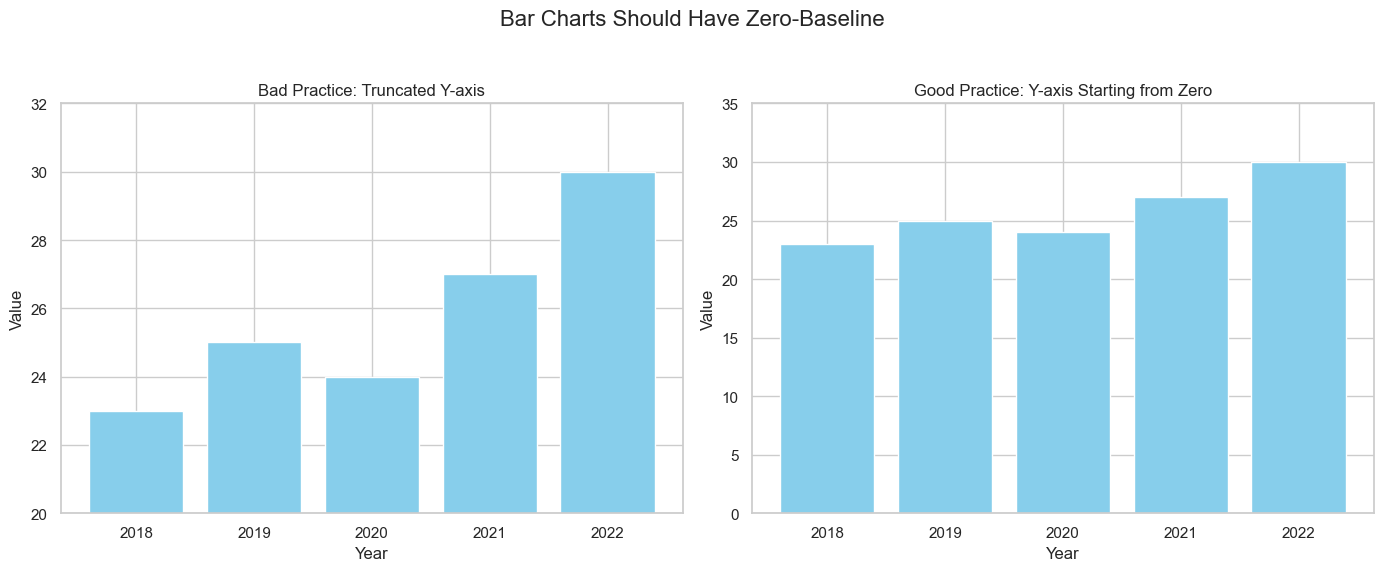

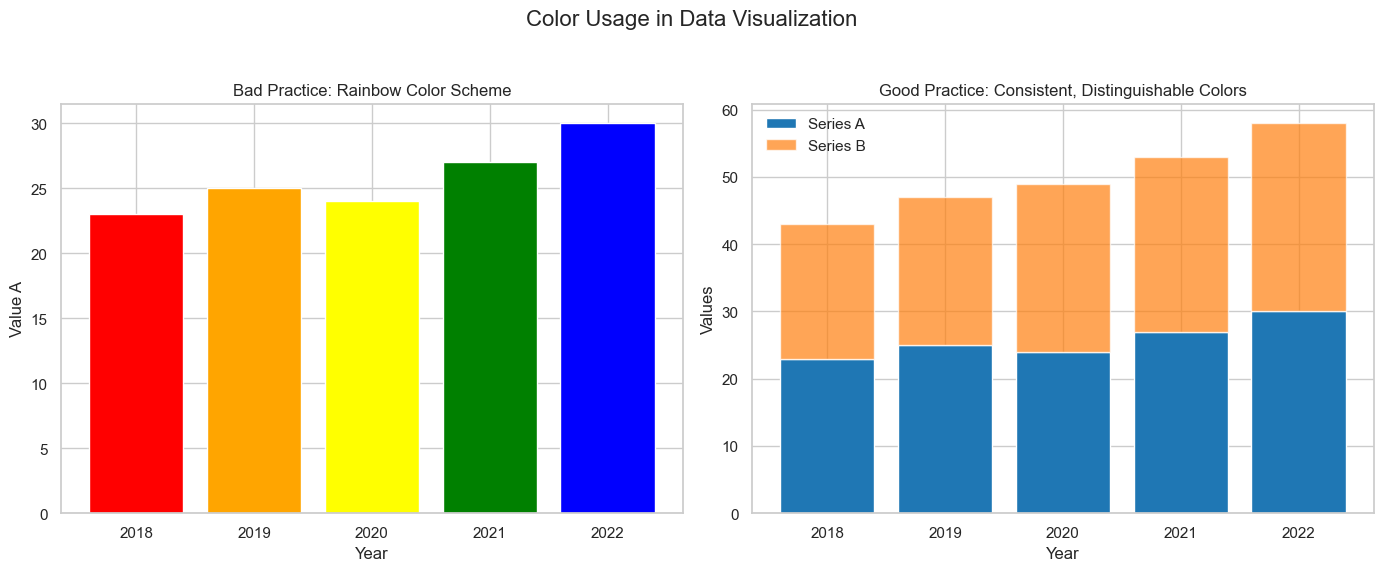

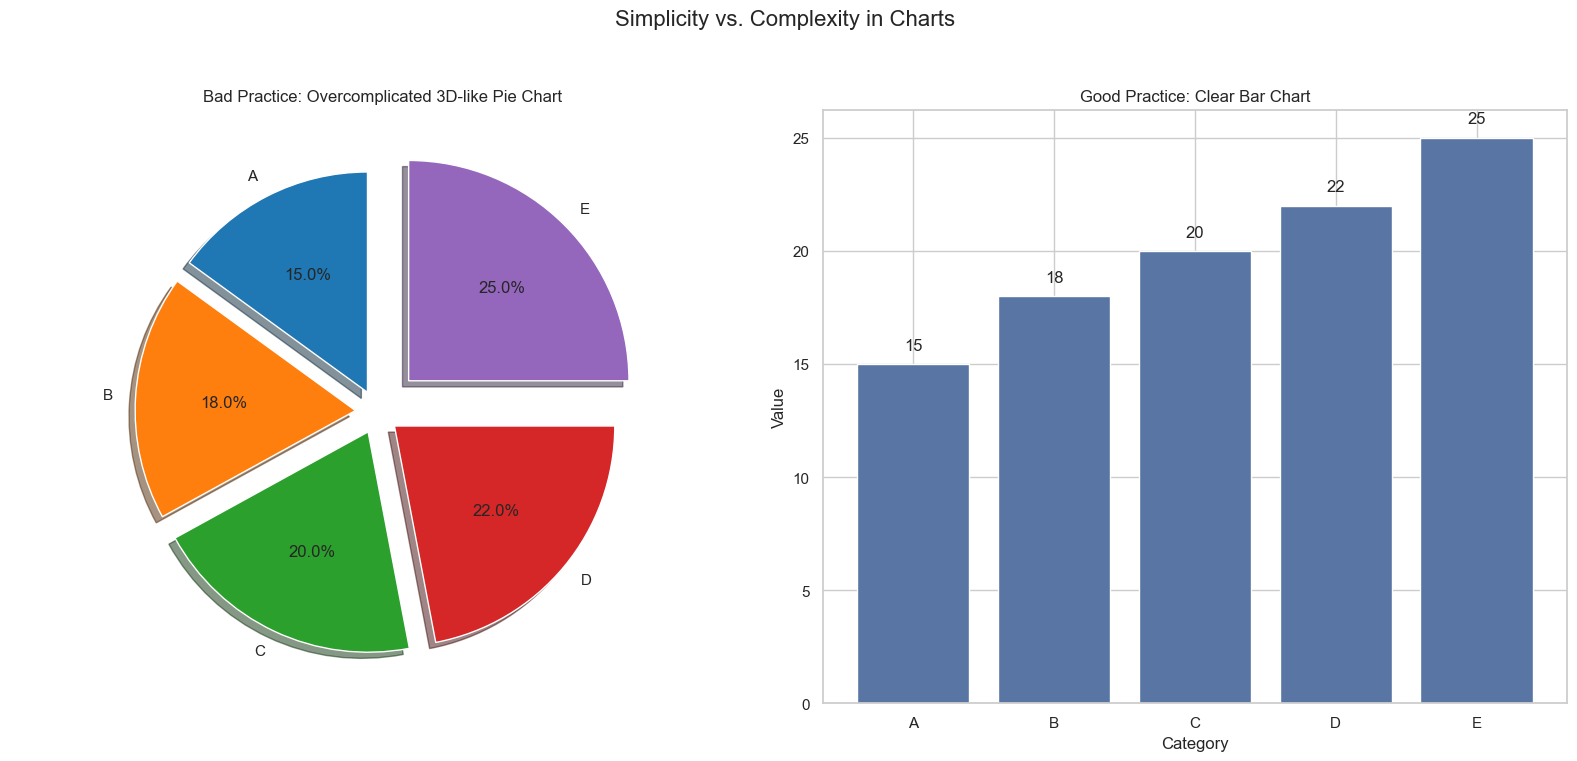

In [34]:
# Examples of bad vs. good practices

# Create some data
years = [2018, 2019, 2020, 2021, 2022]
values_a = [23, 25, 24, 27, 30]
values_b = [20, 22, 25, 26, 28]

# Bad practice: Non-zero baseline distorting the visual comparison
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Bad example
axes[0].bar(years, values_a, color='skyblue')
axes[0].set_ylim(20, 32)  # Truncated y-axis
axes[0].set_title('Bad Practice: Truncated Y-axis')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Value')

# Good example
axes[1].bar(years, values_a, color='skyblue')
axes[1].set_ylim(0, 35)  # Full y-axis starting from 0
axes[1].set_title('Good Practice: Y-axis Starting from Zero')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Value')

plt.suptitle('Bar Charts Should Have Zero-Baseline', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Bad practice: Poor color choice vs. good practice: Effective color use
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Bad example: Rainbow color scheme (hard to interpret, colorblind-unfriendly)
rainbow_colors = ['red', 'orange', 'yellow', 'green', 'blue']
axes[0].bar(years, values_a, color=rainbow_colors)
axes[0].set_title('Bad Practice: Rainbow Color Scheme')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Value A')

# Good example: Consistent color for the same variable
axes[1].bar(years, values_a, color='#1f77b4', label='Series A')
axes[1].bar(years, values_b, color='#ff7f0e', label='Series B', alpha=0.7, bottom=values_a)
axes[1].set_title('Good Practice: Consistent, Distinguishable Colors')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Values')
axes[1].legend()

plt.suptitle('Color Usage in Data Visualization', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Bad vs. good: Overcomplicated vs. clear chart
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Bad example: Overcomplicated 3D pie chart
explode = (0.1, 0.1, 0.1, 0.1, 0.2)
axes[0].pie([15, 18, 20, 22, 25], labels=['A', 'B', 'C', 'D', 'E'],
          explode=explode, autopct='%1.1f%%', shadow=True,
          startangle=90, labeldistance=1.1,
          pctdistance=0.6)
axes[0].axis('equal')
axes[0].set_title('Bad Practice: Overcomplicated 3D-like Pie Chart')

# Good example: Simple, clear bar chart
categories = ['A', 'B', 'C', 'D', 'E']
values = [15, 18, 20, 22, 25]
bars = axes[1].bar(categories, values, color='#5975a4')
axes[1].set_title('Good Practice: Clear Bar Chart')
axes[1].set_xlabel('Category')
axes[1].set_ylabel('Value')

# Add value labels
for bar in bars:
    height = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width()/2., height + 0.5,
                 f'{height}',
                 ha='center', va='bottom')

plt.suptitle('Simplicity vs. Complexity in Charts', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

## Conclusion

In this notebook, we've explored a wide range of data visualization techniques using Python libraries including Matplotlib, Seaborn, and Plotly. We've learned how to:

- Create basic and advanced static visualizations with Matplotlib
- Produce statistical visualizations with Seaborn
- Build interactive plots with Plotly
- Visualize geographical and time series data
- Apply advanced customization techniques
- Follow best practices for effective data visualization

Effective data visualization is both an art and a science. It requires technical skills to manipulate data and create charts, but also design sensibilities to present information clearly and compellingly. By mastering these visualization techniques, you'll be well-equipped to explore data, discover insights, and communicate findings in your data science projects.

### Next Steps

- Explore additional specialized libraries like Bokeh, Altair, or GGPlot
- Experiment with dashboard creation using Dash or Streamlit
- Practice creating visualizations for different audiences
- Review the gallery of examples for each library for inspiration

## Practice Exercises

Try these exercises to reinforce your visualization skills:

1. Create a visualization that shows the relationship between 'satisfaction' and 'churn' in our sample dataset
2. Build a small dashboard with at least 3 different plot types showing insights from the tips dataset
3. Make an animated visualization showing how a metric changes over time
4. Choose a real dataset from an online source (like Kaggle) and create visualizations to explore it
5. Recreate one of the plots from this notebook but improve it by applying the best practices we discussed

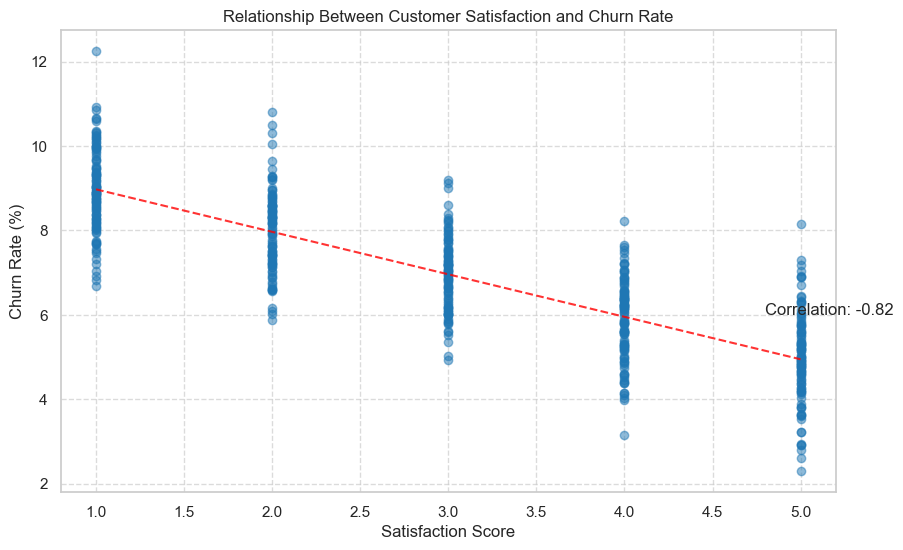

<Figure size 1200x600 with 0 Axes>

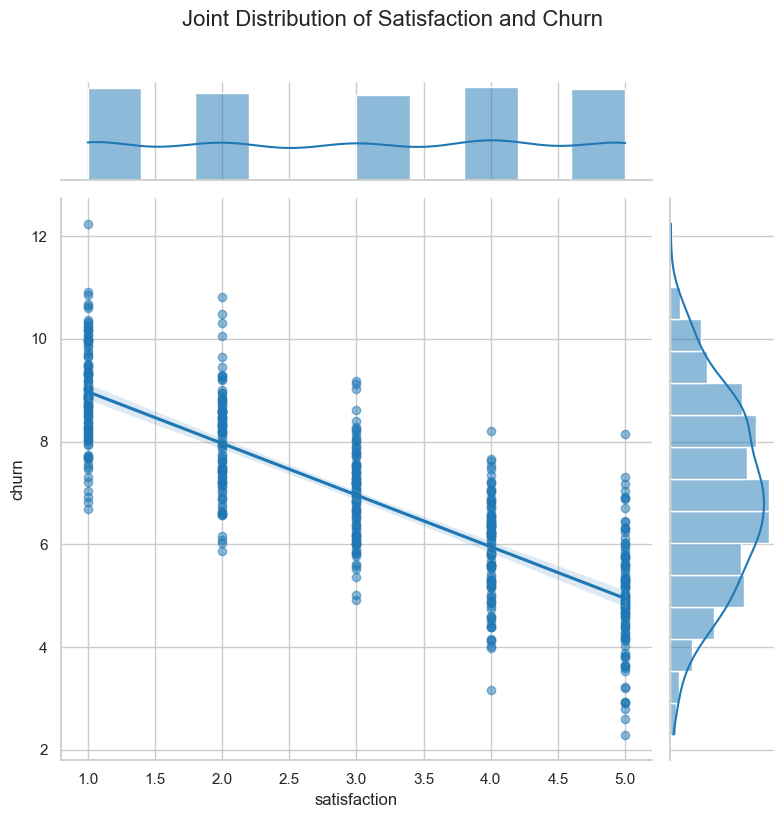

c:\Users\mb\AppData\Local\Programs\Python\Python312\Lib\site-packages\plotly\express\_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [35]:
# Solution for Exercise 1: Visualize relationship between satisfaction and churn

# Let's create visualizations with different libraries

# 1. Matplotlib scatter plot with additional annotations
plt.figure(figsize=(10, 6))
plt.scatter(df['satisfaction'], df['churn'], alpha=0.5)
plt.title('Relationship Between Customer Satisfaction and Churn Rate')
plt.xlabel('Satisfaction Score')
plt.ylabel('Churn Rate (%)')

# Add a trend line
z = np.polyfit(df['satisfaction'], df['churn'], 1)
p = np.poly1d(z)
plt.plot(np.sort(df['satisfaction'].unique()), p(np.sort(df['satisfaction'].unique())), "r--", alpha=0.8)

# Add annotations
plt.text(4.8, 6, f"Correlation: {df['satisfaction'].corr(df['churn']):.2f}", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# 2. Seaborn visualization
plt.figure(figsize=(12, 6))

# Create a joint plot
sns.jointplot(
    x='satisfaction', 
    y='churn', 
    data=df,
    kind='reg',
    scatter_kws={'alpha':0.5},
    height=8
)

plt.suptitle('Joint Distribution of Satisfaction and Churn', y=1.02, fontsize=16)
plt.tight_layout()
plt.show()

# 3. Plotly interactive visualization
fig = px.scatter(df.sample(200), x='satisfaction', y='churn', color='category',
                trendline='ols', opacity=0.7,
                title='Interactive Satisfaction vs. Churn Analysis',
                labels={'satisfaction': 'Satisfaction Score', 'churn': 'Churn Rate (%)'},
                hover_data=['revenue', 'customers'])

fig.update_layout(
    annotations=[
        dict(x=4.8, y=df['churn'].max()*0.9, 
             text=f"Correlation: {df['satisfaction'].corr(df['churn']):.2f}",
             showarrow=False, bgcolor='white')
    ]
)

fig.show()